Project Title

Stock price prediction system

Project Description

The aim of this project is to develop a stock price prediction system for Tesla that generates actionable buy or no-buy signals based on historical stock data. Specifically, the system will predict whether purchasing Tesla stock will be beneficial by analyzing past performance and trends.

Data Source:
• The project uses historical stock data from Tesla, which includes key metrics such as the stock's opening, closing, high, and low prices, along with the trading volume.

Goal:
• To predict a binary signal indicating whether the stock’s closing price on the next trading day will be higher (buy signal) or lower (no-buy signal) compared to the current day’s closing price.

Use Case:
• The prediction system is designed to assist investors and traders by providing an automated recommendation on whether to buy Tesla stock. This recommendation is based on historical data patterns and trends.

Data Collection and Preparation:
• Load the Tesla stock dataset and preprocess the data. This includes handling missing values, removing redundant columns, and preparing the data for analysis.

Feature Engineering:
• Create new features that may enhance model performance. This includes calculating price differences (e.g., open-close) and adding time-based indicators such as quarter-end markers.

Exploratory Data Analysis (EDA):
• Perform EDA to understand the dataset's structure, identify trends, and analyze correlations between features. This helps in gaining insights and preparing the data for modeling.

Model Building:
• Develop machine learning models to classify the buy or no-buy signals. Algorithms such as Logistic Regression and Support Vector Machine (SVM) will be used to make these predictions.

Model Evaluation:
• Assess the performance of the models using appropriate metrics (e.g., ROC-AUC) to determine which model provides the most reliable and accurate predictions. The best performing model will be selected based on its ability to generalize to unseen data.

Target Variable (For Supervised Learning)

1. Definition: The target variable is a binary indicator that represents whether it is potentially
profitable to buy Tesla stock based on its predicted price movement from one day to the next.

2. How It’s Calculated:

* 1 (Buy Signal): The target variable is set to 1 if the closing price of the Tesla stock on
the next trading day is expected to be higher than the closing price on the current day.
This prediction suggests a potential opportunity to buy the stock because the model
forecasts a price increase.

* 0 (Don’t Buy Signal): The target variable is set to 0 if the closing price of the Tesla
stock on the next trading day is expected to be lower or the same as the closing price
on the current day. This prediction suggests that it may not be advantageous to buy
the stock because the model does not forecast a price increase.


3. How to Determine the Target Variable:

• To determine whether the target is 1 or 0, the model compares the closing price of today with
the predicted closing price of the next trading day.
• If Next_Day_Close > Today_Close, then the target is set to 1 (indicating a buy signal).
• If Next_Day_Close <= Today_Close, then the target is set to 0 (indicating a no-buy signal).
4.  
Use in Decision-Making:
• The target variable helps in making stock trading decisions by predicting the direction of the
stock price. A ‘1’ (Buy Signal) indicates a potential opportunity to profit by purchasing the
stock, while a ‘0’ (Don’t Buy Signal) suggests avoiding a purchase due to expected price
stagnation or decline.

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Machine Learning tools

In [171]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit #Hyperparameter tuning (RandomSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    roc_curve,
    auc,
    confusion_matrix,
    roc_auc_score,
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [172]:
df = pd.read_csv('/content/drive/My Drive/ML Assignment/TSLA.csv')

In [173]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [174]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
638,2022-04-11,1008.469971,974.640015,980.400024,975.929993,19660500.0,975.929993


In [175]:
df.shape

(639, 7)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [177]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [178]:
df.columns = df.columns.str.strip()  #Remove any leading or trailing whaite spaces

In [179]:
print("Columns:", df.columns)

Columns: Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Exploratory Data Analysis

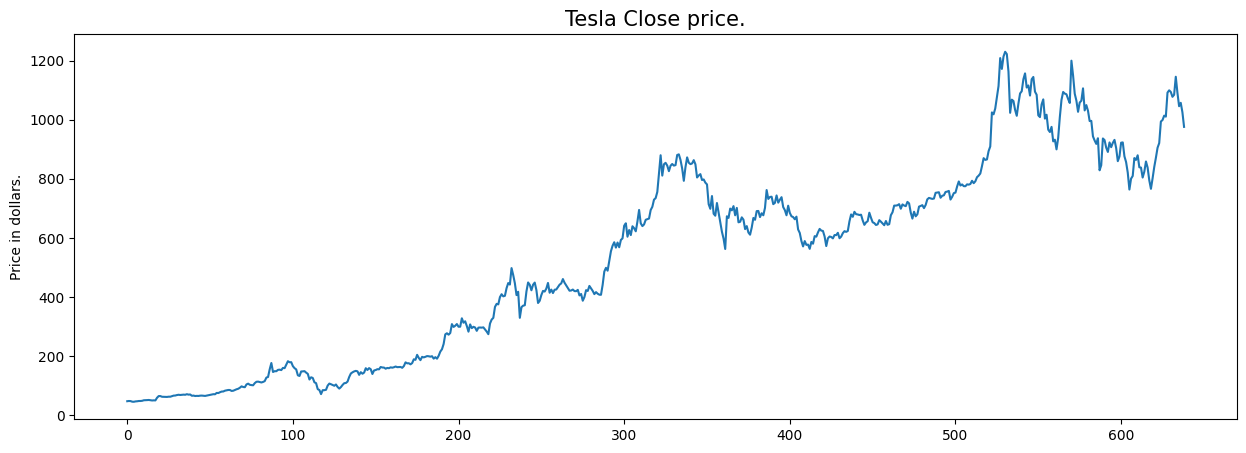

In [180]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [181]:
df[df['Close'] == df['Adj Close']].shape

(639, 7)

In [182]:
df = df.drop(['Adj Close'], axis=1)   #Drop columns

Check missing values in each column

In [183]:
df.isnull().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0


Plot the Histogram

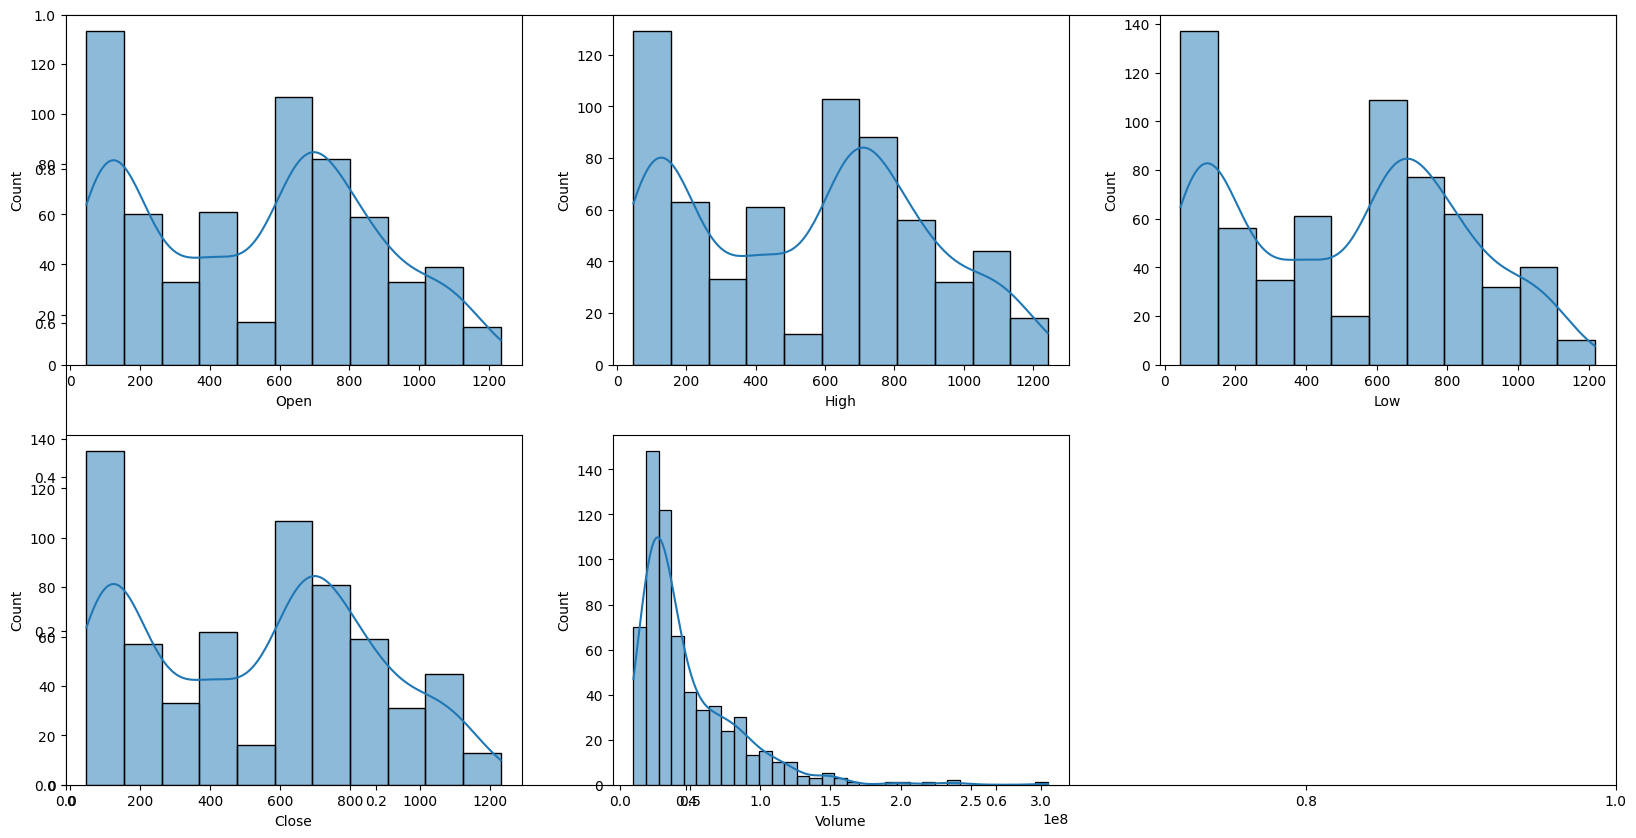

In [184]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col] , kde=True)
plt.show()

In [185]:
splitted = df['Date'].str.split('-', expand=True)

df['Year'] = splitted[0].astype('int')
df['Month'] = splitted[1].astype('int')
df['Day'] = splitted[2].astype('int')

df.head()

,Date,High,Low,Open,Close,Volume,Year,Month,Day
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,2019,9,30
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,2019,10,1
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,2019,10,2
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,2019,10,3
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,2019,10,4


In [186]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,High,Low,Open,Close,Volume,Year,Month,Day,is_quarter_end
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,2019,9,30,1
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,2019,10,1,0
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,2019,10,2,0
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,2019,10,3,0
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,2019,10,4,0


Plot the mean value of the each column

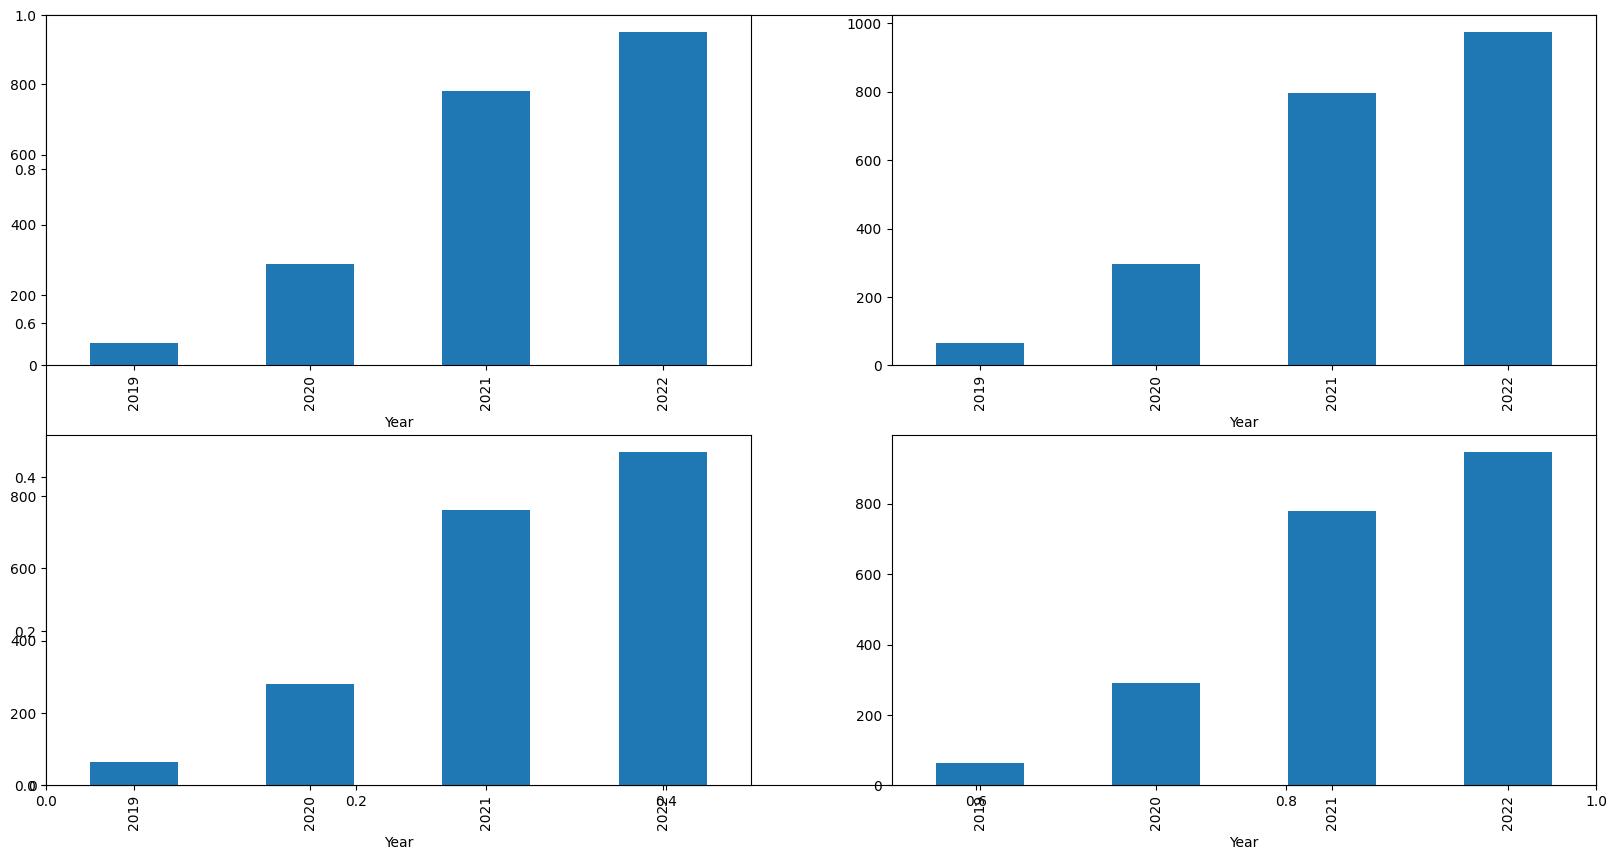

In [187]:
data_grouped = df.drop('Date', axis=1).groupby('Year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open','High','Low','Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [188]:
df.drop('Date',axis=1).groupby('is_quarter_end').mean()

,High,Low,Open,Close,Volume,Year,Month,Day
is_quarter_end,,,,,,,,
0,537.826601,512.947180,525.494497,525.656104,4.886455e+07,2020.508353,6.076372,15.527446
1,553.906989,527.285055,541.497355,542.043335,4.690906e+07,2020.509091,7.431818,15.750000


In [189]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)  #Check next day closing price is greater than the current day closing price

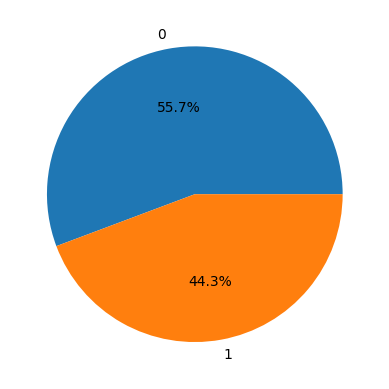

In [190]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [191]:
df_reset = df.reset_index()
print(df_reset.columns)

Index(['index', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Year',
       'Month', 'Day', 'is_quarter_end', 'open-close', 'low-high', 'target'],
      dtype='object')


In [192]:
df_reset = df.reset_index()
print(df_reset.head())  # Shows the first few rows of the DataFrame


   index        Date       High        Low       Open      Close      Volume  \
0      0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0   
1      1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0   
2      2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0   
3      3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0   
4      4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0   

   Year  Month  Day  is_quarter_end  open-close  low-high  target  
0  2019      9   30               1    0.425999 -1.574001       1  
1  2019     10    1               0   -0.638000 -1.363998       0  
2  2019     10    2               0    0.032001 -1.043999       0  
3  2019     10    3               0   -0.233997 -2.040001       0  
4  2019     10    4               0    0.035999 -1.342003       1  


In [193]:
print(df_reset.index)


RangeIndex(start=0, stop=639, step=1)


In [194]:
print(df.head())  # Check the first few rows
print(df.columns)  # Ensure 'Date' is listed


         Date       High        Low       Open      Close      Volume  Year  \
0  2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0  2019   
1  2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0  2019   
2  2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0  2019   
3  2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0  2019   
4  2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0  2019   

   Month  Day  is_quarter_end  open-close  low-high  target  
0      9   30               1    0.425999 -1.574001       1  
1     10    1               0   -0.638000 -1.363998       0  
2     10    2               0    0.032001 -1.043999       0  
3     10    3               0   -0.233997 -2.040001       0  
4     10    4               0    0.035999 -1.342003       1  
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Year', 'Month',
       'Day', 'is_quarter_end', 'open-close', 'low-high', 'target'],
      dtyp

In [195]:
print([col for col in df.columns if 'Date' in col.lower()])  # Checks for similar names


[]


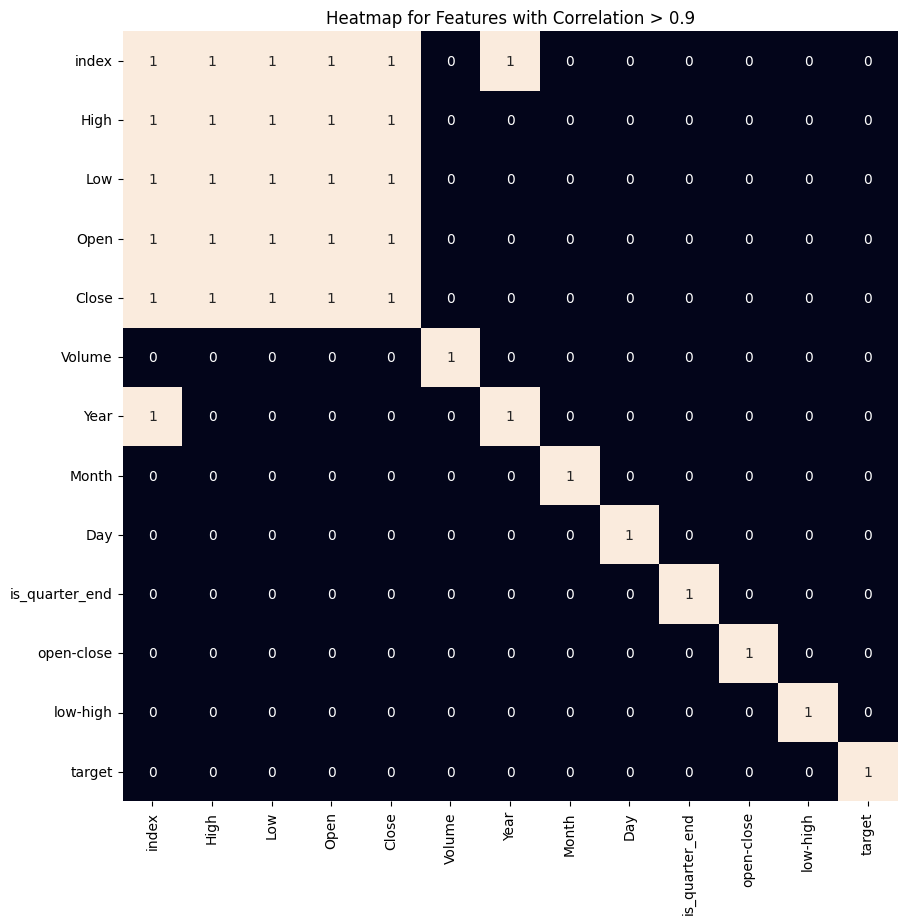

In [196]:
# Additional Heatmap for Highly Correlated Features
plt.figure(figsize=(10, 10))

# Reset the index temporarily to drop 'Date' column
df_reset = df.reset_index()

# Generate the heatmap with correlation greater than 0.9
sns.heatmap(df_reset.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)

plt.title('Heatmap for Features with Correlation > 0.9')
plt.show()


In [197]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(575, 3) (64, 3)


Feature Engineering

In [198]:
df['Price Change'] = df['Close'] - df['Open']
df['Price Direction'] = np.where(df['Price Change'] > 0, 1, 0)

Adding lagged features for temporal patterns

In [199]:
for lag in range(1, 4):  # 1-day, 2-day, 3-day lag
    df[f'Lag_Close_{lag}'] = df['Close'].shift(lag)   #Learn from past details

Drop rows with Nan values after adding lagged features

In [200]:
df.dropna(inplace=True)

Select features and target

In [201]:
X = df[['High', 'Low', 'Open', 'Close', 'Lag_Close_1', 'Lag_Close_2', 'Lag_Close_3']]
y = df['Price Direction']

Scale features

In [202]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [203]:
train_size = int(len(df) * 0.7)
valid_size = int(len(df) * 0.85)

In [204]:
X_train, X_valid, X_test = (
    X_scaled[:train_size],
    X_scaled[train_size:valid_size],
    X_scaled[valid_size:],
)

In [205]:
y_train, y_valid, y_test = (
    y[:train_size].values,
    y[train_size:valid_size].values,
    y[valid_size:].values,
)

Check the class distribution

In [206]:
class_counts = df['Price Direction'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Price Direction
1    330
0    306
Name: count, dtype: int64


Visualize the class distribution

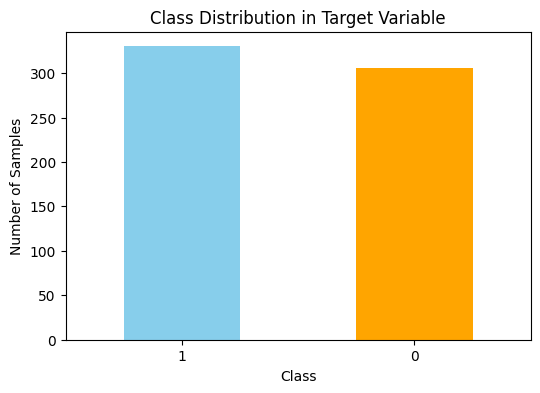

In [207]:
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution in Target Variable")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()

Calculate the imbalanced ratio

In [208]:
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 1.08


In [209]:
if imbalance_ratio > 1.5:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

The dataset is balanced.


Handle imbalance using SMOTE and Tomek Links

In [210]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [211]:
tomek = TomekLinks()
X_train_res, y_train_res = tomek.fit_resample(X_train_res, y_train_res)  #Further cleaning resampling dataset

Logistic regression with Hyperparameter tuning

In [212]:
param_dist = {
    'C': uniform(0.1, 10),  #Regularization parameter
    'penalty': ['l2'],      #Regularization type
    'solver': ['lbfgs'],    #Algorithm for optimization
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced', None],
}

TimeSeries Split for stability

In [213]:
tscv = TimeSeriesSplit(n_splits=5)   #Ensure trainig data always comes before the validation data

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
)
random_search.fit(X_train_res, y_train_res)


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78690c29e290>,
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs']},
                   random_state=42, scoring='roc_auc')

Best model

In [214]:

best_model = random_search.best_estimator_
print("\nBest Parameters:", random_search.best_params_)


Best Parameters: {'C': 9.75255307264138, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


Train best model

In [215]:
best_model.fit(X_train_res, y_train_res)

LogisticRegression(C=9.75255307264138)

Validation Predictions

In [216]:
y_pred_proba_valid = best_model.predict_proba(X_valid)[:, 1]

Optimize threshold based on Precision-Recall curve

In [217]:
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba_valid)
optimal_idx = np.argmax(precision * recall)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold: {optimal_threshold:.2f}")

y_pred_valid = (y_pred_proba_valid >= optimal_threshold).astype(int)


Optimal Threshold: 0.43


Classification Report (Validation)

In [218]:
print("\nValidation Classification Report:")
print(classification_report(y_valid, y_pred_valid))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.90      0.90      0.90        51

    accuracy                           0.89        95
   macro avg       0.89      0.89      0.89        95
weighted avg       0.89      0.89      0.89        95



ROC Curve (Validation)

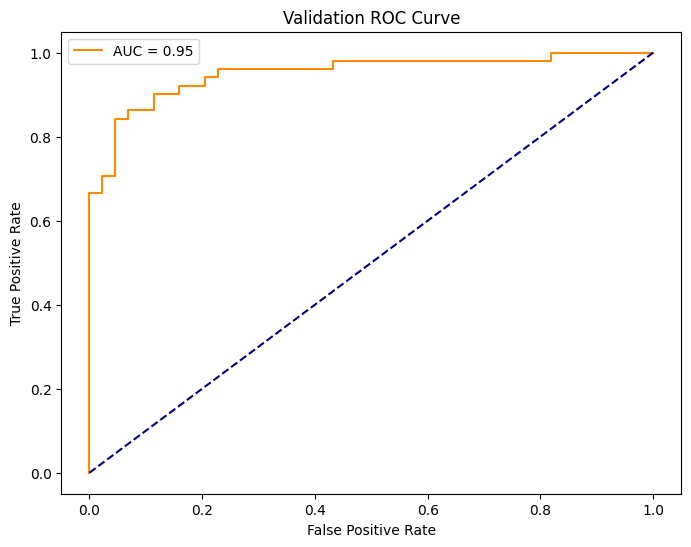

In [219]:
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_valid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc='best')
plt.show()

Final Test Evaluation

In [220]:
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

test_auc = roc_auc_score(y_test, y_pred_proba_test)
print(f"\nTest AUC: {test_auc:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Test AUC: 0.9961

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        45
           1       1.00      0.88      0.94        51

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



Confusion matrix (Test set)

In [221]:
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

test_auc = roc_auc_score(y_test, y_pred_proba_test)
print(f"\nTest AUC: {test_auc:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Test AUC: 0.9961

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        45
           1       1.00      0.88      0.94        51

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



ROC Curve (Test set)

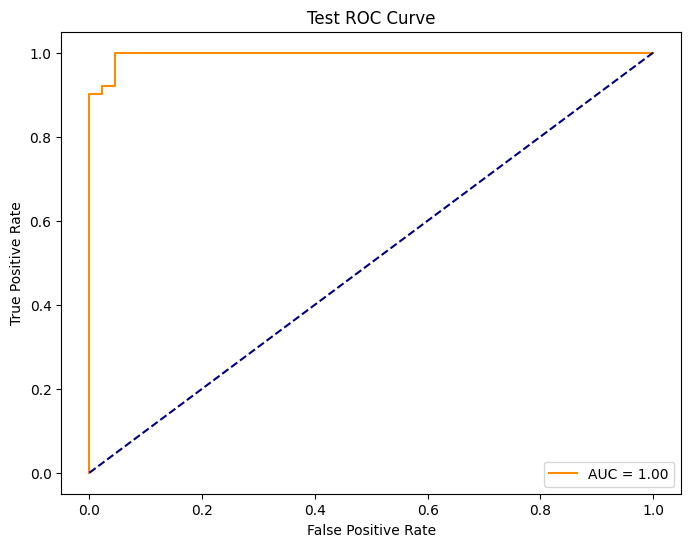

In [222]:
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend(loc='best')
plt.show()

Precision-Recall Curve (Test Set)

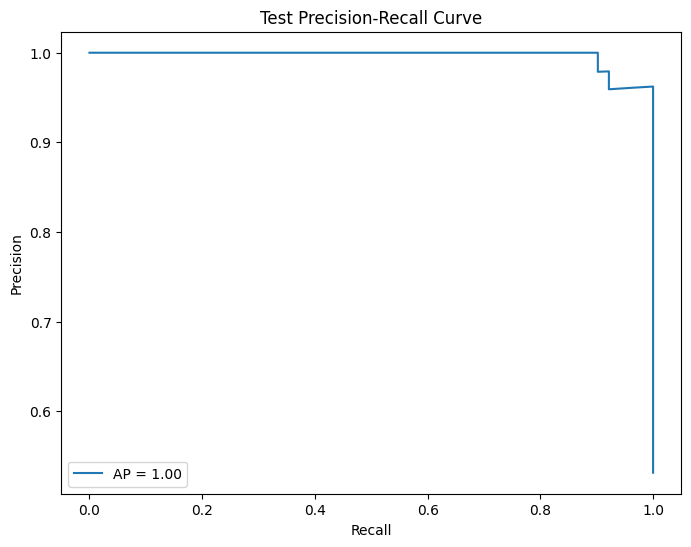

In [223]:
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(recall_test, precision_test, label=f'AP = {auc(recall_test, precision_test):.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Test Precision-Recall Curve')
plt.legend(loc='best')
plt.show()